
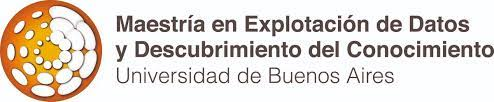

--------
# **Aprendizaje automático**
      1er cuatrimestre 2021 
      TRABAJO PRÁCTICO Nº 2

<u>**Integrantes**</u>:

* López Malizia, Álvaro
* Padula, Eliana Inés
* Rossi, Fabiana Alejandra
--------

# OBJETIVO:
Predecir emociones a partir de archivos de audio

#a) Preprocesamiento: construcción del dataset de trabajo.
Se construyó una base de datos utilizando el conjunto de atributos eGeMAPS y datos provenientes de Ryerson Audiovisual Database of Emotional Speech and Song (RAVDESS) https://zenodo.org/record/1188976#.YLbG6aJKiV4


 **Identificación del nombre del archivo**
Cada dataset tiene un archivo que describe una modalidad (en nuestro caso audio), si es canción o letra, una emoción, etc:

*  Modality (01 = full-AV, 02 = video-only, *03 = audio-only*).
*  Vocal channel (01 = speech, 02 = song).
*  **Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).**
*  Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
*  Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
*  Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


In [ ]:
#Paso1: Bajo los 2 datasets, 
#Creo una carpeta "audio" donde coloco ambas bases; dado que se separan por el vocal channel

!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
!unzip Audio_Speech_Actors_01-24.zip -d audio #Carpeta conjunta

!wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip
!unzip Audio_Song_Actors_01-24.zip -d audio #Carpeta conjunta



--2021-07-14 01:17:40--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip.1’

Audio_Speech_Actors 100%[===================>] 198.81M  29.1MB/s    in 7.7s    

2021-07-14 01:17:49 (25.8 MB/s) - ‘Audio_Speech_Actors_01-24.zip.1’ saved [208468073/208468073]

Archive:  Audio_Speech_Actors_01-24.zip
replace audio/Actor_01/03-01-01-01-01-01-01.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
--2021-07-14 01:23:09--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘Audio

In [ ]:
#Paso2: Librería Opensmile-Python
!sudo apt-get install sox
!pip install opensmile

import opensmile
from pathlib import Path
import tqdm
import glob

Reading package lists... Done
Building dependency tree       
Reading state information... Done
sox is already the newest version (14.4.2-3ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import glob #Para recolectar los datos
from pathlib import Path
import pandas as pd

In [ ]:
#Paso3: Tabla que contiene canciones y audios

#Librerias a usar para recorrer la estructura y sacar los metadatos
import glob #Para recolectar los datos
from pathlib import Path
import pandas as pd
audio = []

for file_path in glob.glob('/content/audio/Actor_*/*.wav'):
  filename = Path(file_path).stem
  filename_parts = filename.split('-')
  metadata = {'file_path': file_path,
              'modality': filename_parts[0],
              'vocal_channel': filename_parts[1],
              'emotion': filename_parts[2],
              'emotional_intensity': filename_parts[3],
              'statement': filename_parts[4],
              'repetition': filename_parts[5],
              'actor': filename_parts[6]}
  audio.append(metadata)

df_audio = pd.DataFrame(audio)

In [ ]:
df_audio.head()

,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,/content/audio/Actor_12/03-01-05-01-02-01-12.wav,03,01,05,01,02,01,12
1,/content/audio/Actor_12/03-01-07-01-01-02-12.wav,03,01,07,01,01,02,12
2,/content/audio/Actor_12/03-01-08-01-02-01-12.wav,03,01,08,01,02,01,12
3,/content/audio/Actor_12/03-02-01-01-02-01-12.wav,03,02,01,01,02,01,12
4,/content/audio/Actor_12/03-01-06-01-02-01-12.wav,03,01,06,01,02,01,12


In [ ]:
# Construcción de dataframe

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02, 
    feature_level=opensmile.FeatureLevel.Functionals)

lista_rows=[]

for i in df_audio['file_path']: # por cada nombre de archivo que aparece en la columna "file_path" de df_audio
  feats = smile.process_file(i) # le digo que aplique smile.process_file( nombre archivo )
  feats = feats.reset_index() # resetea índice
  j=pd.DataFrame(feats) # crea un data frame llamado j
  lista_rows.append(j) # va sumando los dataframes j a la lista vacía que creé al ppio

df_feats=pd.concat(lista_rows) # concatena todos los dataframes j que están en lista_rows
df_feats.head() # y devuelve esto


,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,...,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,/content/audio/Actor_12/03-01-05-01-02-01-12.wav,0 days,0 days 00:00:03.737083333,32.645588,0.090169,29.977459,32.319332,35.263763,5.286304,137.222244,193.606949,25.069715,9.354808,0.182848,1.220302,0.008171,0.045117,0.385504,0.377334,3.856553,2.469516,4.865160,3.775397,0.062395,1.441488,13.817575,1.189718,8.078617,1.396613,6.633669,2.115372,1.745549,8.495353,0.016658,1.120122,1.081738,0.615814,7.432349,0.388763,6.232885,...,735.344421,0.410167,-132.048035,-0.660652,2504.342285,0.107110,748.047729,0.825286,-134.782471,-0.619005,-13.315906,-0.501098,23.868046,0.307841,0.117128,0.240600,-0.014963,-0.686910,0.154667,0.570549,28.837372,0.476114,3.866946,3.368562,10.530784,1.872079,-8.433796,-2.140289,-5.157588,13.950192,0.057182,0.007078,0.008236,1.881720,1.089918,0.332500,0.193827,0.450000,0.446229,-42.784008
0,/content/audio/Actor_12/03-01-07-01-01-02-12.wav,0 days,0 days 00:00:03.703708333,32.705528,0.102518,29.737383,31.938833,36.168022,6.430639,31.400671,9.366849,36.560810,29.690559,0.218332,1.175776,0.014978,0.078059,0.397683,0.382705,4.858770,2.850018,4.107414,2.473625,0.073389,1.414974,15.214304,1.025484,3.020510,3.654806,11.012699,1.217325,-1.366431,-11.127177,0.024659,1.449850,1.157805,0.677699,6.386014,0.505443,3.103755,...,787.079590,0.351964,-123.064400,-0.739466,2490.536865,0.124935,756.614380,0.479245,-125.733040,-0.697362,-10.708830,-0.717724,22.163391,0.362140,0.094989,0.400035,-0.014203,-0.786351,0.155786,0.698121,28.368097,0.463917,-2.568349,-5.260021,12.310513,1.529003,-12.282043,-1.254689,-9.715046,18.487354,0.028725,0.006733,0.015541,2.710027,0.549451,0.755000,0.485000,0.693333,0.421294,-42.666054
0,/content/audio/Actor_12/03-01-08-01-02-01-12.wav,0 days,0 days 00:00:03.503499999,35.890350,0.111084,32.009670,36.225693,37

In [ ]:
df_feats.head()

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,...,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,/content/audio/Actor_12/03-01-05-01-02-01-12.wav,0 days,0 days 00:00:03.737083333,32.645588,0.090169,29.977459,32.319332,35.263763,5.286304,137.222244,193.606949,25.069715,9.354808,0.182848,1.220302,0.008171,0.045117,0.385504,0.377334,3.856553,2.469516,4.865160,3.775397,0.062395,1.441488,13.817575,1.189718,8.078617,1.396613,6.633669,2.115372,1.745549,8.495353,0.016658,1.120122,1.081738,0.615814,7.432349,0.388763,6.232885,...,735.344421,0.410167,-132.048035,-0.660652,2504.342285,0.107110,748.047729,0.825286,-134.782471,-0.619005,-13.315906,-0.501098,23.868046,0.307841,0.117128,0.240600,-0.014963,-0.686910,0.154667,0.570549,28.837372,0.476114,3.866946,3.368562,10.530784,1.872079,-8.433796,-2.140289,-5.157588,13.950192,0.057182,0.007078,0.008236,1.881720,1.089918,0.332500,0.193827,0.450000,0.446229,-42.784008
0,/content/audio/Actor_12/03-01-07-01-01-02-12.wav,0 days,0 days 00:00:03.703708333,32.705528,0.102518,29.737383,31.938833,36.168022,6.430639,31.400671,9.366849,36.560810,29.690559,0.218332,1.175776,0.014978,0.078059,0.397683,0.382705,4.858770,2.850018,4.107414,2.473625,0.073389,1.414974,15.214304,1.025484,3.020510,3.654806,11.012699,1.217325,-1.366431,-11.127177,0.024659,1.449850,1.157805,0.677699,6.386014,0.505443,3.103755,...,787.079590,0.351964,-123.064400,-0.739466,2490.536865,0.124935,756.614380,0.479245,-125.733040,-0.697362,-10.708830,-0.717724,22.163391,0.362140,0.094989,0.400035,-0.014203,-0.786351,0.155786,0.698121,28.368097,0.463917,-2.568349,-5.260021,12.310513,1.529003,-12.282043,-1.254689,-9.715046,18.487354,0.028725,0.006733,0.015541,2.710027,0.549451,0.755000,0.485000,0.693333,0.421294,-42.666054
0,/content/audio/Actor_12/03-01-08-01-02-01-12.wav,0 days,0 days 00:00:03.503499999,35.890350,0.111084,32.009670,36.225693,37

In [ ]:
# cambio el nombre de la columna file_path (a "file")
df_audio = df_audio.rename(columns={'file_path':'file'})

#Armo tabla conjunta
df_final = df_feats.merge(df_audio, on = 'file')
#df_final.to_csv('df_final_eGeMAPS.csv', index=False) # para guardar
#df_final.shape # para chequear dimensiones
#df_final['emotion'].unique() # para ver cuales son las categorías de emocion (las distintas)

#b) Entrenamiento de los modelos de Random Forest y AdaBoost, dividiendo el dataset con la estrategia 12-kfolds o Leave-One-Group-out.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score,confusion_matrix, classification_report,make_scorer,roc_curve
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, cross_validate, GridSearchCV, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.calibration import calibration_curve
from google.colab import drive


#df_final=pd.read_csv('/content/df_final_eGeMAPS.csv') # para hacer más rápido
df=df_final.iloc[:, 3:] # le saco las primeras 3 columnas que no son informativas (file name, start, end)
df.head()

features = df.iloc[:,:-7]
emotion = df['emotion']

x = features.to_numpy() #Datos en array sin split
y = emotion.to_numpy()

##i) 12-fold cross validation 
armando los folds de forma aleatoria.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 0.7)

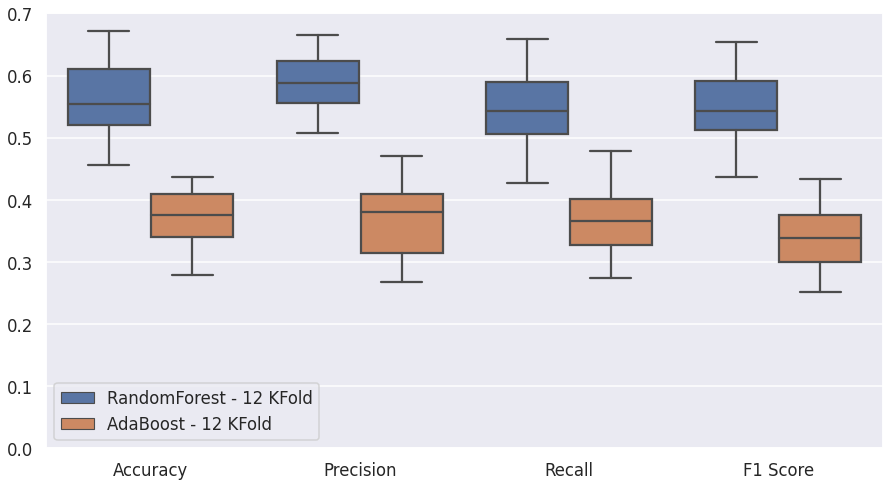

In [ ]:
#12 KFold - SEGUN MODELO DE ENSAMBLE

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

f1_kf=[]
recalls_kf = [] 
fbeta_kf=[]
accuracy_kf=[] 
precision_kf=[]
arbol_rf_kf=[]

skf=StratifiedKFold(n_splits=12, random_state=None, shuffle=False)


# ---------------------Random Forest-------------------

for train_index, test_index in skf.split(x, y):  # vamos a recorrer los indices de los distintos folds
    x_train, x_val = x[train_index], x[test_index] # aca defino el x_train y x_val para el indice train_index y test_index
    y_train, y_val = y[train_index], y[test_index] # aca defino el y_train y y_val para el indice train_index y test_index

    arbol_sklearn = RandomForestClassifier()
    arbol_sklearn.fit(x_train,y_train) # aca lo entreno

    y_pred_val = arbol_sklearn.predict(x_val) 
    f1_kf.append(f1_score(y_val, y_pred_val,average='macro')) #Ver con los chicos
    recalls_kf.append(recall_score(y_val,y_pred_val,average='macro'))
    fbeta_kf.append(fbeta_score(y_val, y_pred_val, 2,average='macro'))
    precision_kf.append(precision_score(y_val, y_pred_val,average='macro'))
    accuracy_kf.append(accuracy_score(y_val, y_pred_val))
 
    arbol_rf_kf.append(arbol_sklearn)

all_metrics =  accuracy_kf + precision_kf + recalls_kf + f1_kf # + fbeta_kf 
metric_labels = ['Accuracy']*len(accuracy_kf)+  ['Precision']*len(precision_kf)  + ['Recall']*len(recalls_kf) + ['F1 Score']*len(f1_kf) # + ['Fbeta Score']*len(fbeta_kf)


# ---------------------Adaboost-------------------
f1_kf=[]
recalls_kf = []
fbeta_kf=[]
accuracy_kf=[] 
precision_kf=[]

arbol_ab_kf=[]

for train_index, test_index in skf.split(x, y):  # vamos a recorrer los indices de los distintos folds
    x_train, x_val = x[train_index], x[test_index] # aca defino el x_train y x_val para el indice train_index y test_index
    y_train, y_val = y[train_index], y[test_index] # aca defino el y_train y y_val para el indice train_index y test_index

    arbol_sklearn = AdaBoostClassifier()
    arbol_sklearn.fit(x_train,y_train) # aca lo entreno

    y_pred_val = arbol_sklearn.predict(x_val) 
    f1_kf.append(f1_score(y_val, y_pred_val,average='macro')) #Ver con los chicos
    recalls_kf.append(recall_score(y_val,y_pred_val,average='macro'))
    fbeta_kf.append(fbeta_score(y_val, y_pred_val, 2,average='macro'))
    precision_kf.append(precision_score(y_val, y_pred_val,average='macro'))
    accuracy_kf.append(accuracy_score(y_val, y_pred_val))
 
    arbol_ab_kf.append(arbol_sklearn)



all_metrics = all_metrics + accuracy_kf + precision_kf + recalls_kf + f1_kf #+fbeta_kf 
metric_labels = metric_labels + ['Accuracy']*len(accuracy_kf)+ ['Precision']*len(precision_kf)  + ['Recall']*len(recalls_kf) + ['F1 Score']*len(f1_kf) # + ['Fbeta Score']*len(fbeta_kf)


hue = ['RandomForest - 12 KFold']*len(accuracy_kf)*4 + ['AdaBoost - 12 KFold']*len(accuracy_kf)*4
sns.set_context('talk')
plt.figure(figsize=(15,8))
sns.boxplot(metric_labels,all_metrics,hue=hue)
plt.ylim(0,0.7)

##ii) Leave-2-speakers out. 
Es decir, 12 folds conteniendo cada uno 2 actores distintos. Se recomienda utilizar la función de sklearn LeaveOneGroupOut

In [ ]:
df['actor'].value_counts() # al actor 18 le faltan datos

14    104
23    104
08    104
17    104
10    104
01    104
03    104
20    104
06    104
22    104
16    104
13    104
11    104
24    104
15    104
21    104
12    104
04    104
05    104
02    104
09    104
07    104
19    104
18     60
Name: actor, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 0.7)

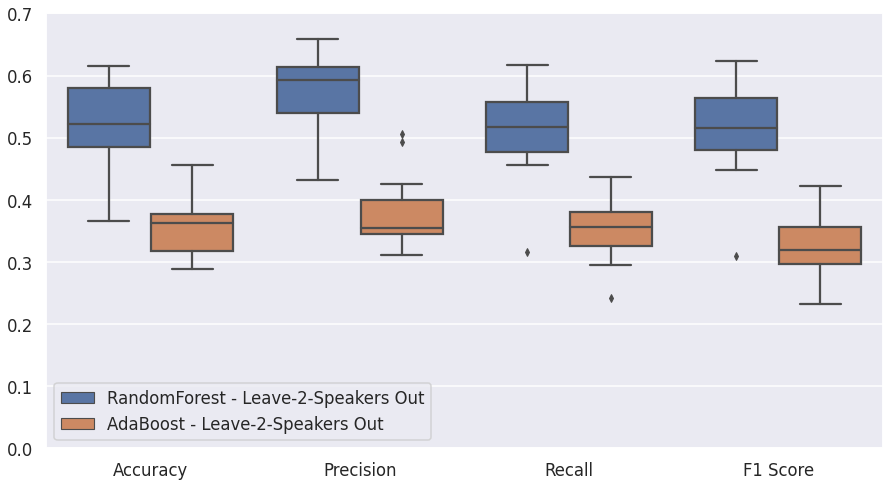

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut

df_2=copy.deepcopy(df) 

# Opción de compromiso -> se debe poner esto en una función
df_2.loc[(df_2['actor'] == '01') | (df_2['actor'] == '02'), 'leaveout'] = 1
df_2.loc[(df_2['actor'] == '03') | (df_2['actor'] == '04'), 'leaveout'] = 2
df_2.loc[(df_2['actor'] == '05') | (df_2['actor'] == '06'), 'leaveout'] = 3
df_2.loc[(df_2['actor'] == '07') | (df_2['actor'] == '08'), 'leaveout'] = 4
df_2.loc[(df_2['actor'] == '09') | (df_2['actor'] == '10'), 'leaveout'] = 5
df_2.loc[(df_2['actor'] == '11') | (df_2['actor'] == '12'), 'leaveout'] = 6
df_2.loc[(df_2['actor'] == '13') | (df_2['actor'] == '14'), 'leaveout'] = 7
df_2.loc[(df_2['actor'] == '15') | (df_2['actor'] == '16'), 'leaveout'] = 8
df_2.loc[(df_2['actor'] == '17') | (df_2['actor'] == '18'), 'leaveout'] = 9
df_2.loc[(df_2['actor'] == '19') | (df_2['actor'] == '20'), 'leaveout'] = 10
df_2.loc[(df_2['actor'] == '21') | (df_2['actor'] == '22'), 'leaveout'] = 11
df_2.loc[(df_2['actor'] == '23') | (df_2['actor'] == '24'), 'leaveout'] = 12

x = np.array(features) 
y = np.array(emotion)
groups = np.array(df_2['leaveout']) 

logo = LeaveOneGroupOut() #definimos la función
logo.get_n_splits(x, y, groups) #Te da la cantidad de grupos

all_metrics = []
metric_labels = []

f1_o=[]
recalls_o = [] 
fbeta_o=[]
accuracy_o=[] 
precision_o=[]
arbol_rf_o=[]

#---------------------- Entrena RandomForest ---------------------------

for train_index, test_index in logo.split(x, y, groups):
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index], y[test_index] 

    arbol_1 =  RandomForestClassifier()
    arbol_1.fit(x_train,y_train) # aca lo entren

    y_pred_val = arbol_1.predict(x_val) 
    f1_o.append(f1_score(y_val, y_pred_val,average='macro')) 
    recalls_o.append(recall_score(y_val,y_pred_val,average='macro'))
    fbeta_o.append(fbeta_score(y_val, y_pred_val, 2,average='macro'))
    precision_o.append(precision_score(y_val, y_pred_val,average='macro'))
    accuracy_o.append(accuracy_score(y_val, y_pred_val))
 
    arbol_rf_o.append(arbol_1)

all_metrics =  accuracy_o + precision_o + recalls_o + f1_o # + fbeta_o 
metric_labels = ['Accuracy']*len(accuracy_o)+  ['Precision']*len(precision_o)  + ['Recall']*len(recalls_o) + ['F1 Score']*len(f1_o) # + ['Fbeta Score']*len(fbeta_o)

#---------------------- Entrena Adaboost ---------------------------

f1_o=[]
recalls_o = [] 
fbeta_o=[]
accuracy_o=[] 
precision_o=[]
arbol_ab_o=[]
logo = LeaveOneGroupOut()

for train_index, test_index in logo.split(x, y,groups):  
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index], y[test_index] 

    arbol_2 = AdaBoostClassifier()
    arbol_2.fit(x_train,y_train) # aca lo entreno


    y_pred_val = arbol_2.predict(x_val) 
    f1_o.append(f1_score(y_val, y_pred_val,average='macro')) 
    recalls_o.append(recall_score(y_val,y_pred_val,average='macro'))
    fbeta_o.append(fbeta_score(y_val, y_pred_val, 2,average='macro'))
    precision_o.append(precision_score(y_val, y_pred_val,average='macro'))
    accuracy_o.append(accuracy_score(y_val, y_pred_val))

    arbol_ab_o.append(arbol_2)



all_metrics = all_metrics + accuracy_o + precision_o + recalls_o + f1_o # + fbeta_o 
metric_labels = metric_labels + ['Accuracy']*len(accuracy_o)+  ['Precision']*len(precision_o)  + ['Recall']*len(recalls_o) + ['F1 Score']*len(f1_o) # + ['Fbeta Score']*len(fbeta_o)

hue = ['RandomForest - Leave-2-Speakers Out']*len(accuracy_o)*4 + ['AdaBoost - Leave-2-Speakers Out']*len(accuracy_o)*4
sns.set_context('talk')
plt.figure(figsize=(15,8))
sns.boxplot(metric_labels,all_metrics,hue=hue)
plt.ylim(0,0.7)


#c) división de datos utilizando Leave2out
# búsqueda de hiperparámetros para los modelos RandomForest y AdaBoost
# comparación del desempeño (datos hablados y cantados por separado)

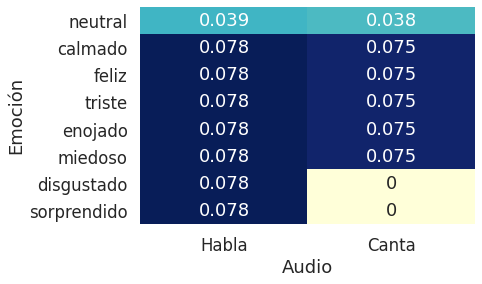

In [ ]:
# Análisis de balanceo de clases objetivo según tipo de Audio (Cantado o Hablado)
a= "emotion"
b= ['vocal_channel'] #Agregar sexo, Actor
z =  [True] # [,True]

for i in range(len(b)):#cambiar numero
    crosstab = pd.crosstab(df[a],df[b[i]],margins = False, normalize = True, colnames= ['Audio'], rownames= ['Emoción'])
    sns.heatmap(crosstab,cmap="YlGnBu",annot=True, cbar=False, yticklabels= ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'], xticklabels= ['Habla','Canta'])
    plt.show()

In [ ]:
# Separación entre los datasets cantados y hablados. #Speech = 1, Song =2
# (porque después se deben evaluar por separado)

features_h = df_2[df_2['vocal_channel'] == '01'].iloc[:,:-8] # un índice menos porque se agrega leaveoneout
emotion_h = df_2[df_2['vocal_channel'] == '01']['emotion']
groupsh = df_2[df_2['vocal_channel'] == '01']['leaveout']
features_c = df_2[df_2['vocal_channel'] == '02'].iloc[:,:-8] # un índice menos porque se agrega leaveoneout
emotion_c = df_2[df_2['vocal_channel'] == '02']['emotion']
groupsc = df_2[df_2['vocal_channel'] == '02']['leaveout']
xh = np.array(features_h) 
yh = np.array(emotion_h)
gh = np.array(groupsh)
xc = np.array(features_c) 
yc = np.array(emotion_c)
gc = np.array(groupsc)

logo = LeaveOneGroupOut() #definimos la función

# Armo dataframe habla y canto por separado
df_hablado = df_2[df_2['vocal_channel'] == '01']
df_cantado = df_2[df_2['vocal_channel'] == '02']

## búsqueda de hiperparámetros para ambos modelos. 
ACA NO HAY QUE DIVIDIR EN DESARROLLO Y HELDOUT, SINO USAR DIRECTAMENTE TODOS LOS DATOS DE X/Y PARA BUSCAR LOS HIPERPARÁMETROS CON LEAVE-ONE-GROUP-OUT

In [ ]:
# ASÍ ESTABAN DEFINIDOS MÁS ARRIBA EN EL CÓDIGO

#x = np.array(features) 
#y = np.array(emotion)
#groups = np.array(df_2['leaveout']) # DE ESTE MODO ME ASEGURO QUE SAQUE DE A PAR. 'leave out' son 12 (paress)

In [ ]:
#Búsqueda de hiperparametros RandomForest
parameters = {'n_estimators':range(50, 100, 5), 'bootstrap':[True, False]} 
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=10, scoring='accuracy',cv=logo.split(x, y, groups=groups), n_iter=10)

clf.fit(x, y)
rf_best = clf.best_estimator_
print(clf.best_score_, clf.best_params_)

0.5339763133208256 {'n_estimators': 75, 'bootstrap': False}


In [ ]:
#Búsqueda de hiperparametros Adaboost
parameters = {'n_estimators':range(50, 100, 5), 'algorithm':['SAMME', 'SAMME.R'], 'random_state': range(1,100)}
ab = RandomizedSearchCV(AdaBoostClassifier(), parameters, n_jobs=10, scoring='accuracy',cv=logo.split(x, y, groups=groups), n_iter=10)

ab.fit(x, y)
ab_best = ab.best_estimator_
print(ab.best_score_, ab.best_params_)

0.4056539243277048 {'random_state': 99, 'n_estimators': 95, 'algorithm': 'SAMME'}


In [ ]:
#pd.DataFrame(clf.cv_results_).head() # para ver todos los rtados de cada uno de los 12 splits RF
#pd.DataFrame(ad.cv_results_).head() # para ver todos los rtados de cada uno de los 12 splits Adaboost

AHORA HAY QUE EVALUAR EL MEJOR MODELO EN LOS 12 FOLDS, PARA CANTADO Y HABLADO POR SEPARADO. LOS RESULTADOS SE DEBEN CONCATENAR.

In [ ]:
resultados_totales_habla=[]
resultados_yval_h=[]
accuracy_hablado=[]

#---------------------- Entrena RandomForest ---------------------------
for train_index, val_index in logo.split(xh, yh, groupsh): # para cada split dentro de hablados
    x_trainh, x_valh = xh[train_index], xh[val_index] # armo train
    y_trainh, y_valh = yh[train_index], yh[val_index] # armo val

    rf_best.fit(x_trainh,y_trainh) # aca lo entrena con el mejor random forest que se consiguió con la selección de hiperparámetros
    y_pred_valh = rf_best.predict(x_valh) # y_pred_val sería la predicción sobre x_val
    resultados_totales_habla.append(y_pred_valh)
    resultados_yval_h.append(y_valh)
    accuracy_hablado.append(rf_best.score(x_valh, y_valh)) # accuracy de los 12 splits para hablados



resultados_totales_canta=[]
resultados_yval_c=[]
accuracy_cantado=[]

#---------------------- Entrena RandomForest ---------------------------
for train_index, val_index in logo.split(xc, yc, groupsc): # para cada split dentro de hablados
    x_trainc, x_valc = xc[train_index], xc[val_index] # armo train
    y_trainc, y_valc = yc[train_index], yc[val_index] # armo val

    rf_best.fit(x_trainc,y_trainc) # aca lo entrena con el mejor random forest que se consiguió con la selección de hiperparámetros
    y_pred_valc = rf_best.predict(x_valc) # y_pred_val sería la predicción sobre x_val   
    resultados_totales_canta.append(y_pred_valc)
    resultados_yval_c.append(y_valc)
    accuracy_cantado.append(rf_best.score(x_valc, y_valc))# accuracy de los 12 splits para cantados

In [ ]:
# como los resultados estaban en forma de lista de arrays, lo paso a un único array con la función concatenar de numpy
y_pred_cantado=np.concatenate(resultados_totales_canta, axis=0)
y_pred_hablado=np.concatenate(resultados_totales_habla, axis=0)
y_val_hablado=np.concatenate(resultados_yval_h, axis=0)
y_val_cantado=np.concatenate(resultados_yval_c, axis=0)

In [ ]:
print("Random Forest con búsqueda de Hiperparámetros, Leave 2 speakers ot - Hablado")
print(classification_report(y_val_hablado,y_pred_hablado,target_names = ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'],digits=2))
print("Random Forest con búsqueda de Hiperparámetros, Leave 2 out - Cantado")
print(classification_report(y_val_cantado,y_pred_cantado, target_names = ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso'], digits=2))


Random Forest con búsqueda de Hiperparámetros, Leave 2 out - Cantado
              precision    recall  f1-score   support

     neutral       0.90      0.78      0.84        92
     calmado       0.66      0.62      0.64       184
       feliz       0.51      0.57      0.54       184
      triste       0.53      0.49      0.51       184
     enojado       0.72      0.74      0.73       184
     miedoso       0.52      0.54      0.53       184

    accuracy                           0.61      1012
   macro avg       0.64      0.63      0.63      1012
weighted avg       0.62      0.61      0.61      1012

Random Forest con búsqueda de Hiperparámetros, Leave 2 speakers ot - Hablado
              precision    recall  f1-score   support

     neutral       0.43      0.28      0.34        96
     calmado       0.55      0.70      0.62       192
       feliz       0.38      0.42      0.40       192
      triste       0.36      0.34      0.35       192
     enojado       0.59      0.58      0

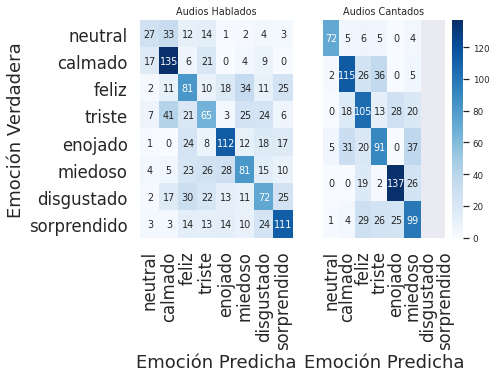

<Figure size 7200x3600 with 0 Axes>

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2)
sns.set(font_scale=.8)
ax1.get_shared_y_axes().join(ax2)
cm_1 = confusion_matrix(y_val_hablado,y_pred_hablado)
g1 = sns.heatmap(cm_1, cmap='Blues',annot=True,fmt='g',  label='small',ax = ax1, cbar = False, xticklabels= ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'], yticklabels=['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'])
g1.set_xlabel('Emoción Predicha')
g1.set_ylabel('Emoción Verdadera')
g1.set_title('Audios Hablados')

cm_2 = confusion_matrix(y_val_cantado,y_pred_cantado)
g2 =  sns.heatmap(cm_2, cmap='Blues',annot=True,fmt='g', label='small',  ax = ax2, yticklabels= False, xticklabels= ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'])
g2.set_xlabel('Emoción Predicha')
g2.set_title('Audios Cantados')

for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    tlt = ax.get_title()
    ax.set_title(tlt, rotation=0)

plt.figure(figsize=(100,50))
plt.show()

#d) Evaluación del desempeño del modelo de Random Forest cuando es entrenado con datos normalizados por hablante.

In [ ]:
from scipy.stats import zscore # creación de nueva df con datos normalizados
features = df.iloc[:,:-7]
scalable= pd.concat([features, df['actor']], axis=1)
numeric_cols = scalable.columns
df_norm = df[numeric_cols].groupby('actor')
df_n= df_norm.transform(zscore)
df_n = pd.concat([df_n,df.iloc[:,-7:]],axis=1)

In [ ]:
# ahora a la matriz normalizada le agrego la columna que me permite hacer leave one group out
df_3=copy.deepcopy(df_n) 

# Opción de compromiso -> se debe poner esto en una función
df_3.loc[(df_3['actor'] == '01') | (df_3['actor'] == '02'), 'leaveout'] = 1
df_3.loc[(df_3['actor'] == '03') | (df_3['actor'] == '04'), 'leaveout'] = 2
df_3.loc[(df_3['actor'] == '05') | (df_3['actor'] == '06'), 'leaveout'] = 3
df_3.loc[(df_3['actor'] == '07') | (df_3['actor'] == '08'), 'leaveout'] = 4
df_3.loc[(df_3['actor'] == '09') | (df_3['actor'] == '10'), 'leaveout'] = 5
df_3.loc[(df_3['actor'] == '11') | (df_3['actor'] == '12'), 'leaveout'] = 6
df_3.loc[(df_3['actor'] == '13') | (df_3['actor'] == '14'), 'leaveout'] = 7
df_3.loc[(df_3['actor'] == '15') | (df_3['actor'] == '16'), 'leaveout'] = 8
df_3.loc[(df_3['actor'] == '17') | (df_3['actor'] == '18'), 'leaveout'] = 9
df_3.loc[(df_3['actor'] == '19') | (df_3['actor'] == '20'), 'leaveout'] = 10
df_3.loc[(df_3['actor'] == '21') | (df_3['actor'] == '22'), 'leaveout'] = 11
df_3.loc[(df_3['actor'] == '23') | (df_3['actor'] == '24'), 'leaveout'] = 12

xn = np.array(features) 
yn = np.array(emotion)
groupsn = np.array(df_3['leaveout']) 

In [ ]:
# Separación entre los datasets cantados y hablados. #Speech = 1, Song =2
# (porque después se deben evaluar por separado)

features_3h = df_3[df_3['vocal_channel'] == '01'].iloc[:,:-8] # un índice menos porque se agrega leaveoneout
emotion_3h = df_3[df_3['vocal_channel'] == '01']['emotion']
groups3h = df_3[df_3['vocal_channel'] == '01']['leaveout']
features_3c = df_3[df_3['vocal_channel'] == '02'].iloc[:,:-8] # un índice menos porque se agrega leaveoneout
emotion_3c = df_3[df_3['vocal_channel'] == '02']['emotion']
groups3c = df_3[df_3['vocal_channel'] == '02']['leaveout']
x3h = np.array(features_3h) 
y3h = np.array(emotion_3h)
g3h = np.array(groups3h)
x3c = np.array(features_3c) 
y3c = np.array(emotion_3c)
g3c = np.array(groups3c)

In [ ]:
rt_n_habla=[]
rt_n_yval_h=[]
accuracy_hablado_norm=[]
#---------------------- Entrena RandomForest ---------------------------
for train_index, val_index in logo.split(x3h, y3h, groups3h): # para cada split dentro de hablados
    x_trainh, x_valh = x3h[train_index], x3h[val_index] # armo train
    y_trainh, y_valh = y3h[train_index], y3h[val_index] # armo val

    rf_best.fit(x_trainh,y_trainh) # aca lo entrena con el mejor random forest que se consiguió con la selección de hiperparámetros
    y_pred_valh = rf_best.predict(x_valh) # y_pred_val sería la predicción sobre x_val
    rt_n_habla.append(y_pred_valh)
    rt_n_yval_h.append(y_valh)
    accuracy_hablado_norm.append(rf_best.score(x_valh, y_valh)) # accuracy de los 12 splits para hablados


rt_n_canta=[]
rt_n_yval_c=[]
accuracy_cantado_norm=[]
#---------------------- Entrena RandomForest ---------------------------
for train_index, val_index in logo.split(x3c, y3c, groups3c): # para cada split dentro de hablados
    x_trainc, x_valc = x3c[train_index], x3c[val_index] # armo train
    y_trainc, y_valc = y3c[train_index], y3c[val_index] # armo val

    rf_best.fit(x_trainc,y_trainc) # aca lo entrena con el mejor random forest que se consiguió con la selección de hiperparámetros
    y_pred_valc = rf_best.predict(x_valc) # y_pred_val sería la predicción sobre x_val   
    rt_n_canta.append(y_pred_valc)
    rt_n_yval_c.append(y_valc)
    accuracy_cantado_norm.append(rf_best.score(x_valc, y_valc)) # accuracy de los 12 splits para hablados

In [ ]:
y_pred_cnorm=np.concatenate(rt_n_canta, axis=0)
y_pred_hnorm=np.concatenate(rt_n_habla, axis=0)
y_val_hnorm=np.concatenate(rt_n_yval_h, axis=0)
y_val_cnorm=np.concatenate(rt_n_yval_c, axis=0)

In [ ]:
print("Random Forest con búsqueda de Hiperparámetros, Leave 2 speakers ot - Hablado - Normalizado")
print(classification_report(y_val_hnorm,y_pred_hnorm,target_names = ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'],digits=2))
print("Random Forest con búsqueda de Hiperparámetros, Leave 2 out - Cantado - Normalizado")
print(classification_report(y_val_cnorm,y_pred_cnorm, target_names = ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso'], digits=2))


Random Forest con búsqueda de Hiperparámetros, Leave 2 speakers ot - Hablado - Normalizado
              precision    recall  f1-score   support

     neutral       0.55      0.44      0.49        96
     calmado       0.61      0.78      0.69       192
       feliz       0.50      0.53      0.52       192
      triste       0.43      0.37      0.40       192
     enojado       0.72      0.62      0.66       192
     miedoso       0.59      0.54      0.56       192
  disgustado       0.57      0.59      0.58       192
 sorprendido       0.61      0.67      0.64       192

    accuracy                           0.58      1440
   macro avg       0.57      0.57      0.57      1440
weighted avg       0.57      0.58      0.57      1440

Random Forest con búsqueda de Hiperparámetros, Leave 2 out - Cantado - Normalizado
              precision    recall  f1-score   support

     neutral       0.75      0.68      0.72        92
     calmado       0.72      0.79      0.75       184
       feliz

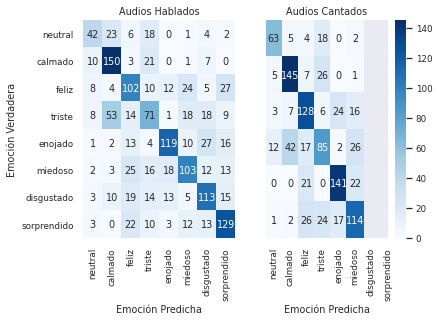

<Figure size 7200x3600 with 0 Axes>

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2)
sns.set(font_scale=.8)
ax1.get_shared_y_axes().join(ax2)
cm_1 = confusion_matrix(y_val_hnorm,y_pred_hnorm)
g1 = sns.heatmap(cm_1, cmap='Blues',annot=True,fmt='g',  label='small',ax = ax1, cbar = False, xticklabels= ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'], yticklabels=['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'])
g1.set_xlabel('Emoción Predicha')
g1.set_ylabel('Emoción Verdadera')
g1.set_title('Audios Hablados')

cm_2 = confusion_matrix(y_val_cnorm,y_pred_cnorm)
g2 =  sns.heatmap(cm_2, cmap='Blues',annot=True,fmt='g', label='small',  ax = ax2, yticklabels= False, xticklabels= ['neutral', 'calmado', 'feliz', 'triste', 'enojado', 'miedoso', 'disgustado','sorprendido'])
g2.set_xlabel('Emoción Predicha')
g2.set_title('Audios Cantados')

for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    tlt = ax.get_title()
    ax.set_title(tlt, rotation=0)

plt.figure(figsize=(100,50))
plt.show()

In [ ]:
mean_acc_hablado=sum(accuracy_hablado)/len(accuracy_hablado)
mean_acc_cantado=sum(accuracy_cantado)/len(accuracy_cantado)
mean_acc_hablado_norm=sum(accuracy_hablado_norm)/len(accuracy_hablado_norm)
mean_acc_cantado_norm=sum(accuracy_cantado_norm)/len(accuracy_cantado_norm)

sd_hablado=np.std(accuracy_hablado)
sd_cantado=np.std(accuracy_cantado)
sd_hablado_norm=np.std(accuracy_hablado_norm)
sd_cantado_norm=np.std(accuracy_cantado_norm)

print('Accuracy medio de audios hablados:',round(mean_acc_hablado,3),'+/-',round(sd_hablado,3))
print('Accuracy medio de audios cantados:',round(mean_acc_cantado,3),'+/-',round(sd_cantado,3))
print('Accuracy medio de audios hablados normalizados:',round(mean_acc_hablado_norm,3),'+/-',round(sd_hablado_norm,3))
print('Accuracy medio de audios cantados normalizados:',round(mean_acc_cantado_norm,3),'+/-',round(sd_cantado_norm,3))

Accuracy medio de audios hablados: 0.475 +/- 0.064
Accuracy medio de audios cantados: 0.614 +/- 0.104
Accuracy medio de audios hablados normalizados: 0.576 +/- 0.094
Accuracy medio de audios cantados normalizados: 0.67 +/- 0.064


#Opcional: Modelo de perceptrón multicapa.


In [ ]:
# multi-class classification with Keras - Librerias usadas
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import tensorflow.keras.layers as tfkl

In [ ]:
#Dataset - Uso los datos ya separados
X = x.astype(float)
Y = y
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
#Defino el modelo

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=88, activation='relu')) #Son 88 varibles y elijo 128 nodos
	model.add(Dense(8, activation='softmax')) #Son 8 emociones posibles
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=logo.split(X, dummy_y, groups=groups))
print("Accuracy sobre datos entrenados: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy sobre datos entrenados: 30.51% (6.01%)


In [ ]:
#Tipo de modelo
from keras.models import Sequential, Model
  
model = Sequential()
model.add(Dense(128, input_dim=88, activation='relu')) #Son 88 varibles y elijo 128 nodos
model.add(Dense(8, activation='softmax')) #Son 8 emociones posibles
	# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()